In [ ]:
import tensorflow as tf

from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import cifar10

import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [ ]:
(x_train, t_train), (x_test, t_test) = cifar10.load_data()

x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

print('x_train.shape = ', x_train.shape, ' , x_test.shape = ', x_test.shape)
print('t_train.shape = ', t_train.shape, ' , t_test.shape = ', t_test.shape)

x_train.shape =  (50000, 32, 32, 3)  , x_test.shape =  (10000, 32, 32, 3)
t_train.shape =  (50000, 1)  , t_test.shape =  (10000, 1)


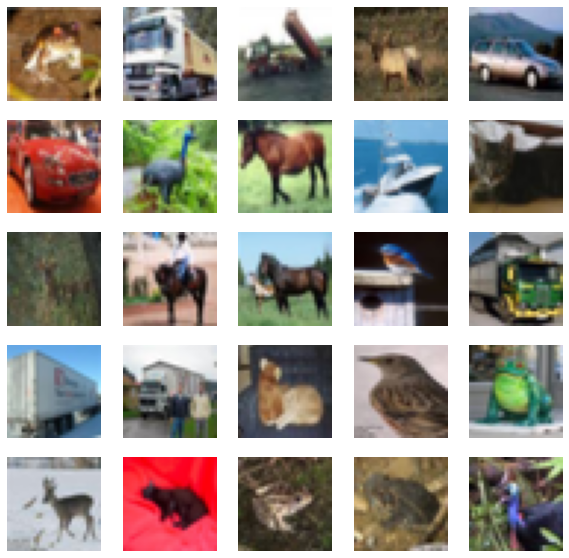

In [ ]:
# 데이터 출력

plt.figure(figsize=(10,10))

for index in range(25):

    plt.subplot(5, 5, index+1)
    plt.imshow(x_train[index])
    plt.axis('off')

plt.show()

In [ ]:
print('x_train.shape = ', x_train.shape, ' , x_test.shape = ', x_test.shape)
print('t_train.shape = ', t_train.shape, ' , t_test.shape = ', t_test.shape)

x_train.shape =  (50000, 32, 32, 3)  , x_test.shape =  (10000, 32, 32, 3)
t_train.shape =  (50000, 1)  , t_test.shape =  (10000, 1)


In [ ]:
cnn = Sequential()

cnn.add(Conv2D(input_shape=(32,32,3), kernel_size=(3,3), filters=32, activation='relu'))
cnn.add(Conv2D(kernel_size=(3,3), filters=64, activation='relu'))

cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())

# 512 개 노드 가지는 Dense
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))

# 출력층
cnn.add(Dense(10, activation='softmax'))

In [ ]:
# cnn compile
# one hot encoding 방식이 아니기 때문에, loss=sparse_categorical_crossentropy 정의

cnn.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
print('x_train.shape = ', x_train.shape, ' , x_test.shape = ', x_test.shape)
print('t_train.shape = ', t_train.shape, ' , t_test.shape = ', t_test.shape)

cnn.summary()

x_train.shape =  (50000, 32, 32, 3)  , x_test.shape =  (10000, 32, 32, 3)
t_train.shape =  (50000, 1)  , t_test.shape =  (10000, 1)
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 conv2d_21 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 dropout_20 (Dropout)        (None, 14, 14, 64)        0         
                                                                 
 flatten_10 (Flatten)        (None, 12544)             0         
                                                     

In [ ]:
start_time = datetime.now()

hist = cnn.fit(x_train, t_train, batch_size=50, epochs=50, validation_data=(x_test, t_test))

end_time = datetime.now()

print('\n\nElapsed Time => ', end_time - start_time)

Epoch 1/50
  34/1000 [>.............................] - ETA: 7s - loss: 1.3337 - accuracy: 0.5282

KeyboardInterrupt: ignored

In [ ]:
# x_test 도 마찬가지로 데이터를 4차원으로 reshape 으로 변환 해주지 않으면 error

cnn.evaluate(x_test, t_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0183 - accuracy: 0.9957


[0.01830989122390747, 0.9957000017166138]

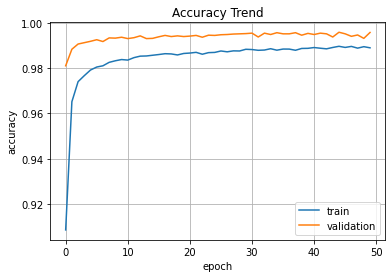

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='best')
plt.grid()
plt.show()

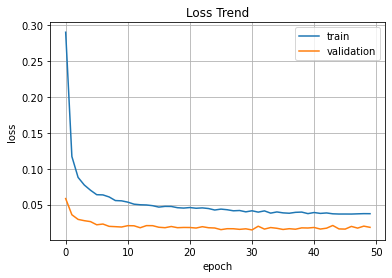

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='best')
plt.grid()
plt.show()